<a href="https://colab.research.google.com/github/kirtikajain/COVID-19-Symptoms-check/blob/master/Netflix_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
%matplotlib inline
plt.style.use('seaborn-darkgrid')
palette=plt.get_cmap('Set3')

In [7]:
netflix_df = pd.read_csv("/content/netflix_titles.csv")

In [8]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [13]:
print('\nColumns with missing value:') 
print(netflix_df.isnull().any())


Columns with missing value:
show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool


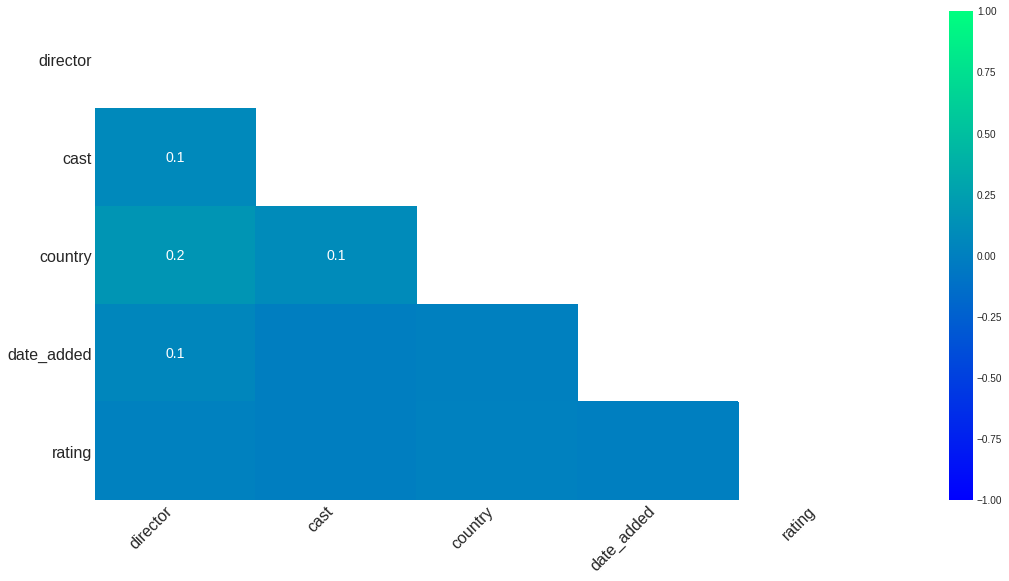

In [36]:
netflix_df.T.apply(lambda x: x.isnull().sum(), axis = 1)
msno.heatmap(netflix_df, figsize=(18,9), cmap='winter')
plt.show()

In [ ]:
netflix_df.isnull().sum().sum()


3631

In [ ]:
netflix_df.director.fillna("No Director", inplace=True)
netflix_df.cast.fillna("No Cast", inplace=True)
netflix_df.country.fillna("Country Unavailable", inplace=True)
netflix_df.dropna(subset=["date_added", "rating"], inplace=True)

In [ ]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

# Exploratory Analysis and Visualization
→ 1. Netflix Content By Type

Analysis entire Netflix dataset consisting of both movies and shows. Let’s compare the total number of movies and shows in this dataset to know which one is the majority.

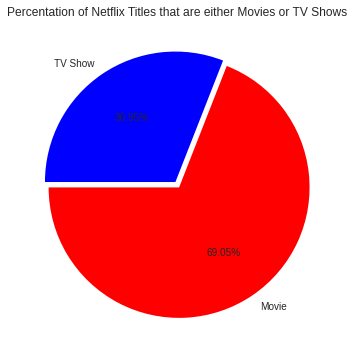

In [40]:
plt.figure(figsize=(12,6))
plt.title("Percentation of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(),explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['red','blue'],autopct='%1.2f%%', startangle=180)
plt.show()

So there are about 4,000++ movies and almost 2,000 TV shows with movies being the majority. In terms of title, there are far more movie titles (68,5%) that TV shows titles (31,5%).

2. Amount of Content as a Function of Time

Next, we will explore the amount of content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a “year_added” column to show the date from the “date_added” columns.

In [46]:
netflix_movies_df = netflix_df[netflix_df.type.str.contains("Movie")]
netflix_shows_df = netflix_df[netflix_df.type.str.contains("TV Show")]
netflix_df.year_added = pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df.date_added).year
netflix_shows_df.year_added = pd.DatetimeIndex(netflix_shows_df.date_added).year
netflix_year_df = netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

netflix_year_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,year,date_added
0,2019.0,2153
1,2020.0,2009
2,2018.0,1685
3,2017.0,1225
4,2016.0,443
5,2021.0,117
6,2015.0,88
7,2014.0,25
8,2011.0,13
9,2013.0,11


In [47]:
movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

movies_year_df

,year,date_added
0,2019,1497
1,2020,1312
2,2018,1255
3,2017,864
4,2016,258
5,2021,88
6,2015,58
7,2014,19
8,2011,13
9,2013,6


In [48]:
shows_year_df = netflix_shows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})

shows_year_df

,year,date_added
0,2020.0,697
1,2019.0,656
2,2018.0,430
3,2017.0,361
4,2016.0,185
5,2015.0,30
6,2021.0,29
7,2014.0,6
8,2013.0,5
9,2008.0,1


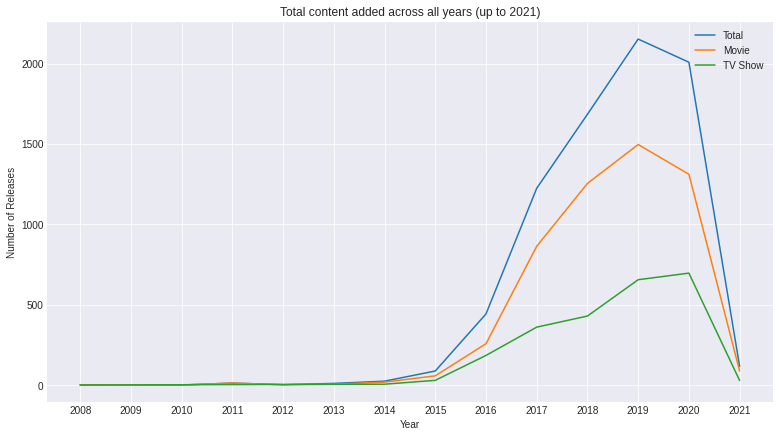

In [51]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x='year', y='date_added')
sns.lineplot(data=movies_year_df, x='year', y='date_added')
sns.lineplot(data=shows_year_df, x='year', y='date_added')
ax.set_xticks(np.arange(2008, 2022, 1))
plt.title("Total content added across all years (up to 2021)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Number of Releases")
plt.xlabel("Year")
plt.show()

→ 3. Countries by the Amount of the Produces Content

Next is exploring the countries by the amount of the produces content of Netflix. We need to separate all countries within a film before analyzing it, then removing titles with no countries available

In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
filtered_countries = netflix_df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

iplot([go.Choropleth(
    locationmode='country names',
    locations=filtered_countries,
    z=filtered_countries.value_counts()
)])

→ 4. Top Directors on Netflix

To know the most popular director, we can visualize it.

In [ ]:
pip install wordcloud

In [5]:
from wordcloud import WordCloud, ImageColorGenerator

<Figure size 720x432 with 0 Axes>

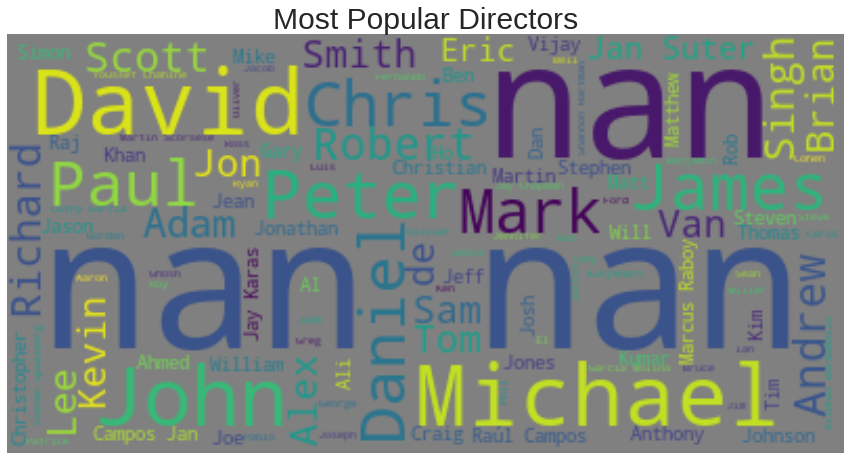

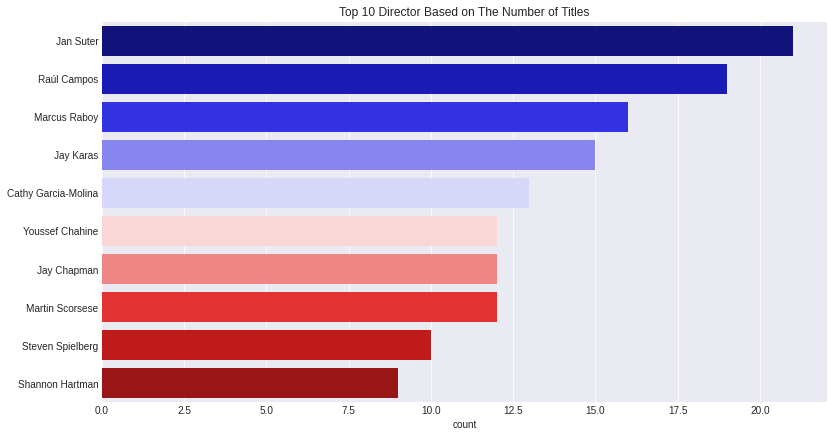

In [6]:
text = " ".join(str(each) for each in netflix_df.director)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="gray").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='Bilinear')
plt.title('Most Popular Directors',fontsize = 30)
plt.axis("off")
plt.show()
filtered_directors = netflix_df[netflix_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='seismic')
plt.show()

→ 5. Top Genres on Netflix

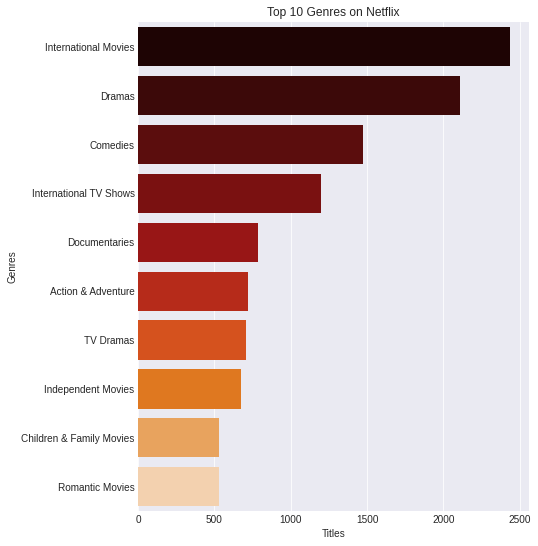

In [56]:
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10],palette="gist_heat")
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

## Asking and Answering Questions

Let's ask some specific quesions, and try to answer them using dataset operations and interensting visualizations.

Q: What is the largest count of Netflix Rating?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



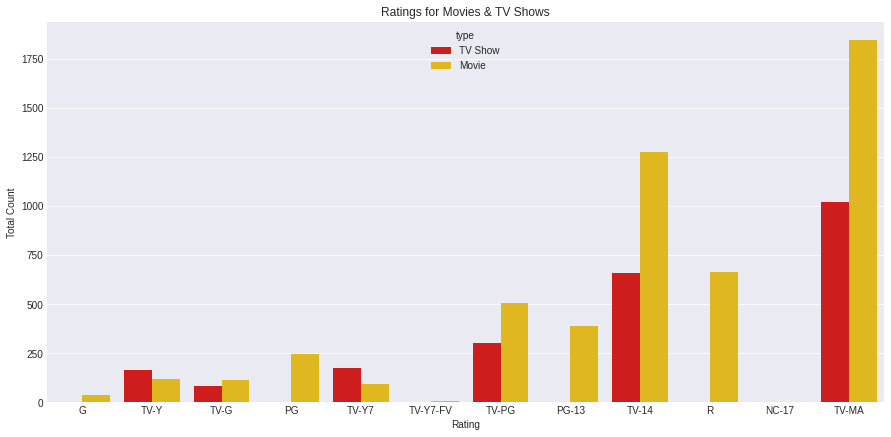

In [58]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(netflix_df.rating, hue=netflix_df.type, order=order, palette="hot");
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

The largest count of Movies and TV shows is made with a "TV-MA" rating. "TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

-> Length Distribution of the films

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



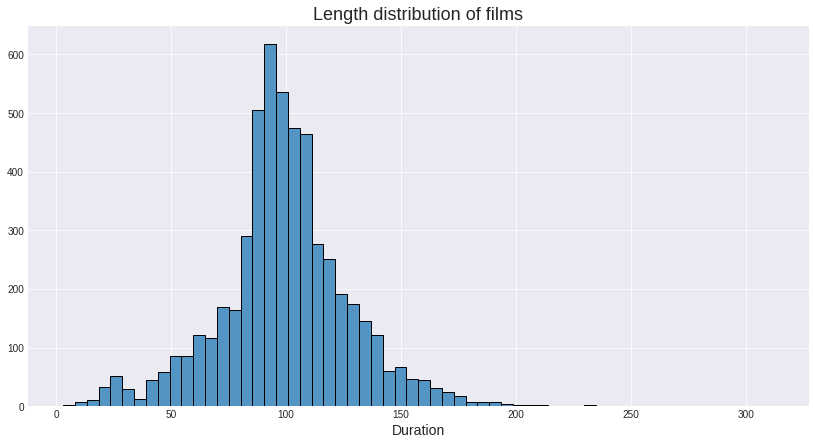

In [ ]:
grp = netflix_df.groupby('type')
movie = grp.get_group('Movie')
movie['duration'] = [int(i.split(' ')[0]) for i in movie.duration.dropna()]
plt.figure(figsize=(14, 7))
sns.histplot(movie['duration'], bins=60).set(ylabel=None)
plt.title('Length distribution of films', fontsize=18)
plt.xlabel('Duration', fontsize=14)
plt.show()

Top 20 shortest movies available on netflix


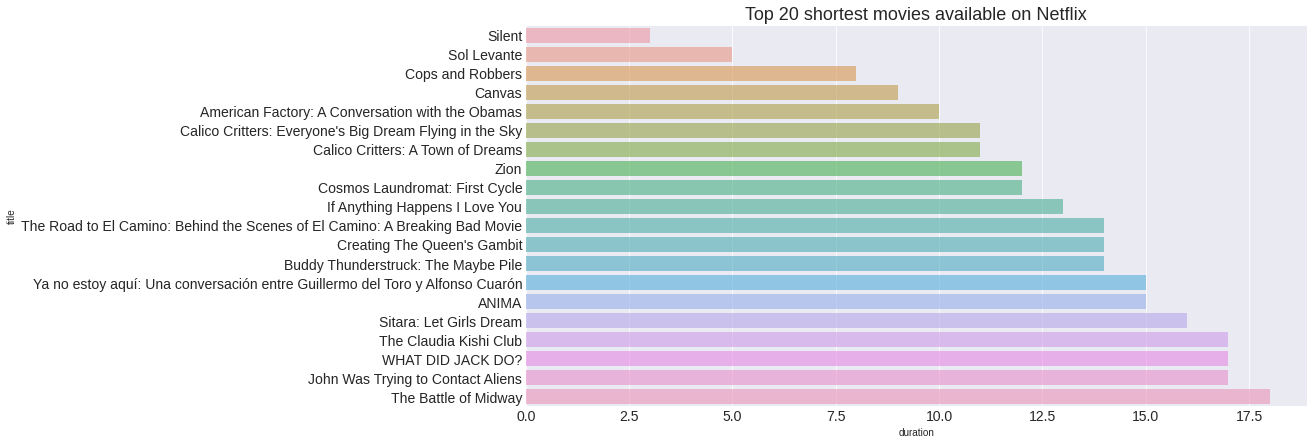

In [ ]:
short = movie.sort_values('duration')[['title', 'duration']].iloc[:20]
plt.figure(figsize=(14,7))
plt.title('Top 20 shortest movies available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=short['title'], x=short['duration'], alpha=0.6)
plt.show()

Top 20 longest movies available on netflix

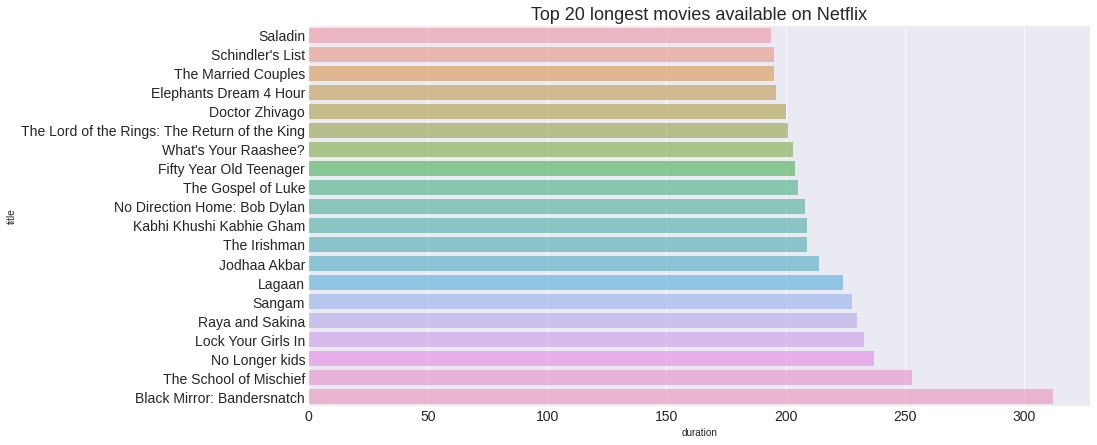

In [ ]:
long = movie.sort_values('duration')[['title', 'duration']].iloc[-20:]
plt.figure(figsize=(14,7))
plt.title('Top 20 longest movies available on Netflix', fontsize=18)
plt.tick_params(labelsize=14)
sns.barplot(y=long['title'], x=long['duration'], alpha=0.6)
plt.show()

Q: Who are the top 10 actors on Netflix ?

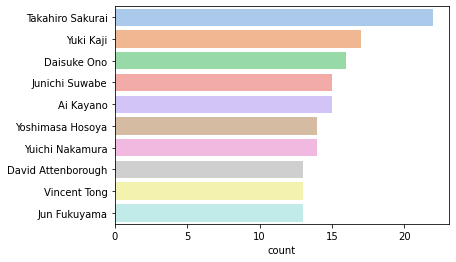

In [ ]:
filtered_cast_shows = netflix_shows_df[netflix_shows_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix TV Show is Takahiro Sakurai

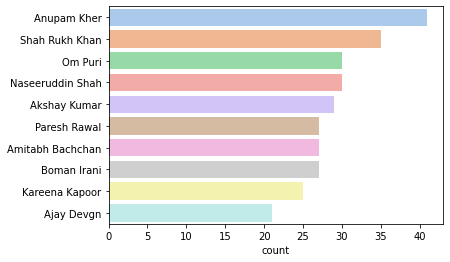

In [ ]:
filtered_cast_movie = netflix_movies_df[netflix_movies_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

The top actor on Netflix Movies is Anupam Kher

## Inferences and Conclusion
We have drawn many interesting inferences from the dataset Netflix titles, here's a summary of the few of them:
1. The most content type on Netflix is movies
2. The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly
3. International Movies is a genre that is mostly in Netflix
4. The largest count of Movies and TV shows is made with a "TV-MA" rating
5. The most popular actor on Netflix based on the number of titles is Anupam Kher
6. The most contributor country to Netflix is the United States
7. The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai

# Model to predict genres of show using BERT+MLP
**Approach:**

We'll be using transfer learning to get embeddings from pretrained BERT for each show's description. Next, we'll be training a MLP from the generated embeddings to predict the show genre.

**Data**

The input data here will be show description and the output labels will be the 42 Genres.

Input data: This will be the text describing a show

Output labels: This will be a vector of size 42 (since there are 42 genres) having values 0 or 1. 0 corresponding to a genre not present and 1 corresponding a genre present

In [ ]:
labels = np.hstack([np.array(i.split(', ')) for i in netflix_df.listed_in.dropna()])
unique = np.unique(labels)
def generate_label(x):
    genres = x.split(', ')
    label = np.zeros(shape=unique.shape)
    for i in genres:
        for j in range(len(unique)):
            if unique[j]==i:
                label[j]=1
    return label.astype(int)

In [ ]:
from tqdm.notebook import tqdm
data = pd.DataFrame()
data['text'] = netflix_df.dropna()['description']
data['title'] = netflix_df.dropna()['title']
data['label'] = [generate_label(x) for x in tqdm(netflix_df.dropna()['listed_in'])]
data[['text', 'label']].head()

,text,label
1,After a devastating earthquake hits Mexico Cit...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
2,"When an army recruit is found dead, his fellow...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,"In a postapocalyptic world, rag-doll robots hi...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,A brilliant group of students become card-coun...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
5,A genetics professor experiments with a treatm...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


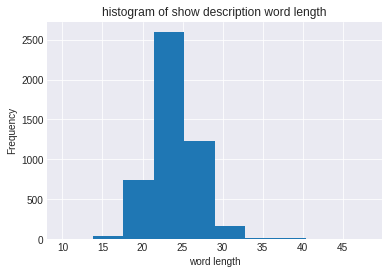

word length at 90 percentile: 27.0
word length at 91 percentile: 27.36999999999989
word length at 92 percentile: 28.0
word length at 93 percentile: 28.0
word length at 94 percentile: 28.0
word length at 95 percentile: 28.0
word length at 96 percentile: 29.0
word length at 97 percentile: 29.0
word length at 98 percentile: 29.0
word length at 99 percentile: 31.0


In [ ]:
# Let's begin by checking the word length of show descriptions so that 
# we can trim and pad the texts to the same length for easy processing in the 
#future steps.
def get_wordlen(x): 
    return len(x.split())

data['len'] = data.text.apply(get_wordlen)
data['len'].plot(kind='hist')
plt.title('histogram of show description word length')
plt.xlabel('word length')
plt.show()
for i in np.arange(0.9,1,0.01):
    p = data.len.quantile(i)
    print(f'word length at {int(i*100)} percentile:',p)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['text', 'title']], data['label'], test_size=0.3, random_state=33)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
y_train.shape, y_val.shape, y_test.shape

((3365,), (721,), (722,))

In [ ]:
!pip install bert-tensorflow

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 29.6MB/s 
     |████████████████████████████████| 901kB 33.3MB/s 
     |████████████████████████████████| 3.3MB 39.2MB/s 


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import Model
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input
tf.get_logger().setLevel('ERROR')

In [ ]:
#Creating a transformer model from pretrained BERT_EN_UNCASED
tf.keras.backend.clear_session()
max_seq_length = 31
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids" )
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False, name='BERT')
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=sequence_output)
bert_model.summary(), bert_model.output, bert_model.input

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1, Total size: 423.26MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 31)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 31)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 31)]         0                                            
__________________________________________________________________________________________________
BERT (KerasLayer)               [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

(None,
 <KerasTensor: shape=(None, None, 768) dtype=float32 (created by layer 'BERT')>,
 [<KerasTensor: shape=(None, 31) dtype=int32 (created by layer 'input_word_ids')>,
  <KerasTensor: shape=(None, 31) dtype=int32 (created by layer 'input_mask')>,
  <KerasTensor: shape=(None, 31) dtype=int32 (created by layer 'segment_ids')>])

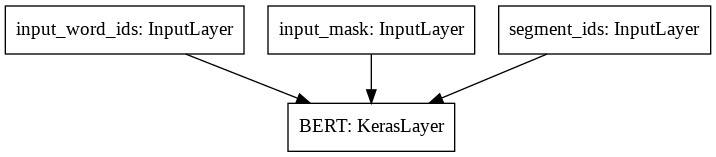

In [ ]:
tf.keras.utils.plot_model(bert_model, show_shapes=False, show_dtype=False,
                          show_layer_names=True, rankdir='TB', 
                          expand_nested=False, dpi=96)

Using tokenization to convert the description text into a format understood by BERT

We'll be creating 3 type of inputs from a given test:

*token_ids:* The token embeddings are numerical representations of words in the input sentence.
*token_masks*: The mask tokens that help BERT to understand what all input words are relevant and what all are just there for padding.
*token_segments:* The segment embeddings are used to help BERT distinguish between the different sentences in a single input.

In [ ]:
from bert import tokenization
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy() 
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def text_to_tokens(x):
    t = np.asarray(tokenizer.tokenize(x))
    if len(t)>max_seq_length-2:
        t = t[:max_seq_length-2]
    padding = np.asarray(['[PAD]']*(max_seq_length-t.shape[0]-2))
    pre, post = np.asarray(['[CLS]']), np.asarray(['[SEP]'])
    final = np.concatenate((pre,t,post,padding))
    ids = np.asarray(tokenizer.convert_tokens_to_ids(final))
    mask = (ids != 0)*1
    segment = np.zeros_like(ids)
    return ids, mask, segment

In [ ]:
from tqdm.notebook import tqdm
# initializing lists to collect the generated tokens, masks and segments. 
X_train_tokens, X_val_tokens, X_test_tokens = [], [], []
X_train_mask, X_val_mask, X_test_mask = [], [], []
X_train_segment, X_val_segment, X_test_segment = [], [], []
# Generating and storing tokens, masks, segments values for X_train texts
for i,x in tqdm(enumerate(X_train.text.values)): 
    t,m,s = text_to_tokens(x) 
    X_train_tokens.append(t) 
    X_train_mask.append(m) 
    X_train_segment.append(s)
    
# Generating and storing tokens, masks, segments values for X_val texts
for i,x in tqdm(enumerate(X_val.text.values)): 
    t,m,s = text_to_tokens(x) 
    X_val_tokens.append(t) 
    X_val_mask.append(m) 
    X_val_segment.append(s)
    
# Generating and storing tokens, masks, segments values for X_test texts
for i,x in tqdm(enumerate(X_test.text.values)): 
    t,m,s = text_to_tokens(x) 
    X_test_tokens.append(t) 
    X_test_mask.append(m) 
    X_test_segment.append(s)


In [ ]:
### Obtaining the numerical embeddings of text from BERT
# converting the tokens lists to array type
X_train_tokens = np.row_stack(X_train_tokens) 
X_val_tokens = np.row_stack(X_val_tokens) 
X_test_tokens = np.row_stack(X_test_tokens)
# converting the masks lists to array type
X_train_mask = np.row_stack(X_train_mask) 
X_val_mask = np.row_stack(X_val_mask) 
X_test_mask = np.row_stack(X_test_mask)
# converting the segment lists to array type
X_train_segment = np.row_stack(X_train_segment) 
X_val_segment = np.row_stack(X_val_segment) 
X_test_segment = np.row_stack(X_test_segment)

In [ ]:
X_train_pooled_output = bert_model.predict([X_train_tokens, X_train_mask, X_train_segment])
X_val_pooled_output = bert_model.predict([X_val_tokens, X_val_mask, X_val_segment])
X_test_pooled_output = bert_model.predict([X_test_tokens, X_test_mask, X_test_segment])
X_train_pooled_output.shape

(3365, 31, 768)

Creating a MLP model which can take the BERT embeddings as input and generate predictions.

Since the embeddings are of a dimension (31, 768), we will forst initially an Input layer of the same dimension, next we'll add a GlobalAveragePooling1D layer to extract 768 embeddings from the input (average for each of the 31 rows) and finally we'll be initializing a Dense layer as the output layer with 42 units and sigmoid as the activation function. Sigmoid is used because each of the 42 outputs could take a value between 0 and 1.

For training the model, we'll use binary_crossentropy as the loss function and Adaptive Momentum (ADAM) as the optimizer.

In [ ]:
tf.keras.backend.clear_session()

input_layer = Input((None, 768))
gpa = GlobalAveragePooling1D()(input_layer)
# x = Dense(units=64, activation='elu')(gpa)
# x = Dense(units=64, activation='elu')(x)
output_layer = Dense(units=42, activation='sigmoid')(gpa)

mlp = Model(input_layer, output_layer)
mlp.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 768)]       0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 42)                32298     
Total params: 32,298
Trainable params: 32,298
Non-trainable params: 0
_________________________________________________________________


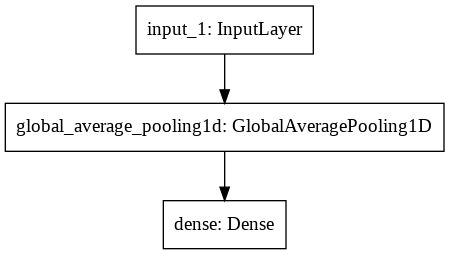

In [ ]:
tf.keras.utils.plot_model(mlp, show_shapes=False, show_dtype=False,
                          show_layer_names=True, rankdir='TB', 
                          expand_nested=False, dpi=96)

In [ ]:
from sklearn.metrics import accuracy_score
def get_accuracy(y, y_pred):
    acc = []
    for i,j in zip(y, y_pred):
        acc.append(accuracy_score(i,j))
    return np.mean(acc)

def accuracy(y, y_pred):
    return tf.py_function(get_accuracy, (y, tf.cast((y_pred>0.5), tf.float32)), tf.double)


In [ ]:
from tensorflow.keras import optimizers
metrics = [accuracy]
mlp.compile(optimizer=optimizers.Adam(0.0001), loss='binary_crossentropy', metrics=metrics)

In [ ]:
y_train_output = np.vstack(y_train.values)
y_test_output = np.vstack(y_test.values)
y_val_output = np.vstack(y_val.values)

In [ ]:
history = mlp.fit(X_train_pooled_output, y_train_output, epochs=40, 
                  validation_data=(X_val_pooled_output, y_val_output))


Epoch 1/40
106/106 [==============================] - 4s 30ms/step - loss: 0.4865 - accuracy: 0.8256 - val_loss: 0.3188 - val_accuracy: 0.9499
Epoch 2/40
106/106 [==============================] - 3s 26ms/step - loss: 0.2546 - accuracy: 0.9502 - val_loss: 0.2101 - val_accuracy: 0.9520
Epoch 3/40
106/106 [==============================] - 3s 26ms/step - loss: 0.1891 - accuracy: 0.9520 - val_loss: 0.1720 - val_accuracy: 0.9536
Epoch 4/40
106/106 [==============================] - 3s 26ms/step - loss: 0.1628 - accuracy: 0.9528 - val_loss: 0.1538 - val_accuracy: 0.9542
Epoch 5/40
106/106 [==============================] - 3s 26ms/step - loss: 0.1491 - accuracy: 0.9531 - val_loss: 0.1433 - val_accuracy: 0.9546
Epoch 6/40
106/106 [==============================] - 3s 26ms/step - loss: 0.1406 - accuracy: 0.9536 - val_loss: 0.1364 - val_accuracy: 0.9551
Epoch 7/40
106/106 [==============================] - 3s 26ms/step - loss: 0.1348 - accuracy: 0.9540 - val_loss: 0.1313 - val_accuracy: 0.9557

In [ ]:

# Performance Check
df_metric = pd.DataFrame()
df_metric['epoch'] = np.arange(len(history.history['loss']))
df_metric['loss'] = history.history['loss']
df_metric['val_loss'] = history.history['val_loss']
df_metric['accuracy'] = history.history['accuracy']
df_metric['val_accuracy'] = history.history['val_accuracy']



In [ ]:
# Train-Val accuracy check
fig = px.line(df_metric, x='epoch', y='accuracy')
fig1 = px.line(df_metric, x='epoch', y='val_accuracy')
fig.show()
fig1.show()

In [ ]:
# Binary cross entropy loss
fig = px.line(df_metric, x="epoch", y="loss")
fig1 = px.line(df_metric, x="epoch", y="val_loss")

fig.show()
fig1.show()

In [42]:
# Below are some samples from the test dataset which has not been seen by our 
# model till now. Let's see how the model performs on these samples.
from sklearn.metrics import accuracy_score
y_pred = (mlp.predict(X_test_pooled_output)>0.5)*1
acc = [accuracy_score(i,j) for i,j in zip(y_pred, y_test)]
idx = np.argsort(acc)[::-1]
def show(i):
    print(f'movie: {X_test.title.values[i]}')
    print(f'description: {X_test.text.values[i]}')
    y_act_idx = unique[np.where(y_test_output[i]==1)]
    y_pred_idx = unique[np.where(y_pred[i]==1)]
    print(f'metric score: {acc[i]}')
    print(f'actual genre: {y_act_idx}')
    print(f'predicted genre: {y_pred_idx}')
    print('\n', '*'*50, '\n')
    
for i in idx[:10]:
    show(i)

NameError: ignored

In [41]:
# histogram of accuracy scores achieved by the model on the test/unseen dataset.

plt.figure(figsize=(14, 7))
sns.histplot(acc, bins=20, palette='winter').set(ylabel='value')
plt.title('Accuracy scores achieved by test data', fontsize=18)
plt.xlabel('Accuracy Score', fontsize=14)
plt.show()

NameError: ignored

<Figure size 1008x504 with 0 Axes>